# Box Plot, Violin Plot and Factor Plot
**Abid Ali**

Email: [abdsoftfsd@gmail.com](mailto:abdsoftfsd@gmail.com)

Skype: abd.soft


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import nan

In [6]:
housing_data = pd.read_csv('datasets/housing.csv')

housing_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

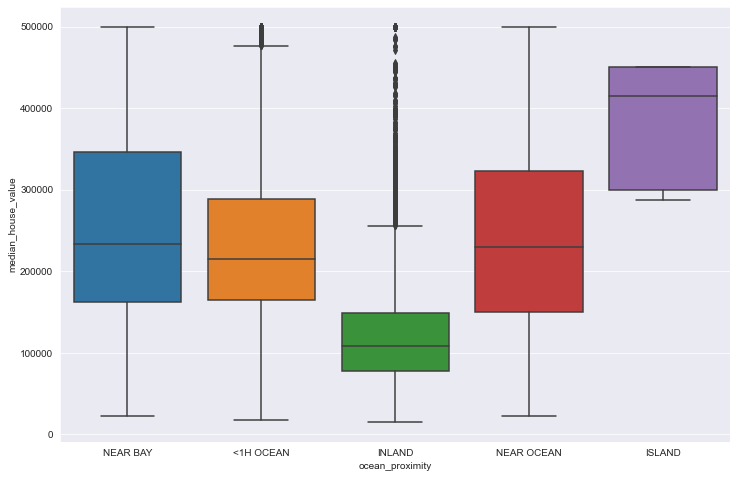

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_data)


In [12]:
island_houses = housing_data.loc[housing_data['ocean_proximity'] == 'ISLAND']
island_houses.shape

(5, 10)

<Axes: xlabel='median_house_value', ylabel='Count'>

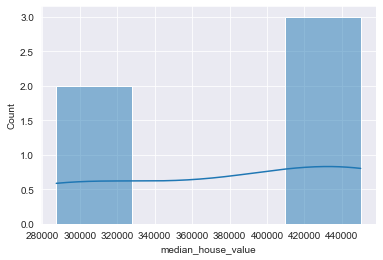

In [13]:
sns.histplot(island_houses['median_house_value'], kde=True)


<Axes: ylabel='median_house_value'>

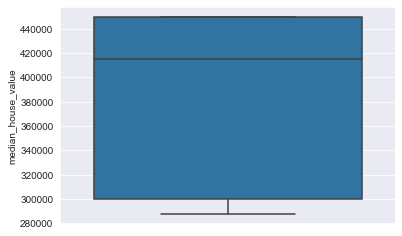

In [16]:
sns.boxplot(y=island_houses['median_house_value'])


In [17]:
median = housing_data['median_house_value'].median()
median


179700.0

In [19]:
housing_data['above_median'] = (housing_data['median_house_value'] - median) > 0
housing_data.sample(6)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,above_median
16676,-120.68,35.14,34.0,3100.0,617.0,1155.0,542.0,3.0938,245900.0,NEAR OCEAN,True
15273,-117.28,33.06,8.0,4172.0,1022.0,2585.0,941.0,4.0118,245800.0,NEAR OCEAN,True
13980,-116.88,34.19,38.0,898.0,259.0,106.0,52.0,1.6875,225000.0,INLAND,True
13020,-121.22,38.71,23.0,1843.0,273.0,818.0,276.0,4.4695,214700.0,INLAND,True
13359,-117.66,34.02,12.0,5616.0,871.0,3019.0,782.0,5.5425,202300.0,INLAND,True
18740,-122.36,40.57,31.0,431.0,90.0,231.0,78.0,2.1840,77300.0,INLAND,False


<Axes: xlabel='ocean_proximity', ylabel='median_income'>

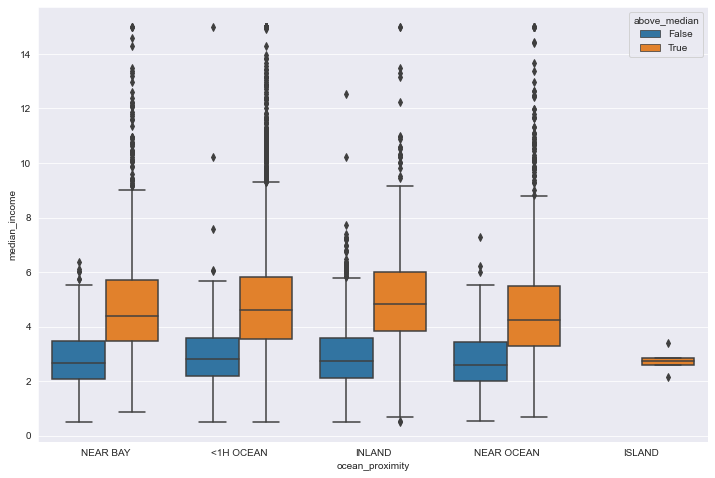

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='ocean_proximity', y='median_income',
            hue='above_median',
            data=housing_data)


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

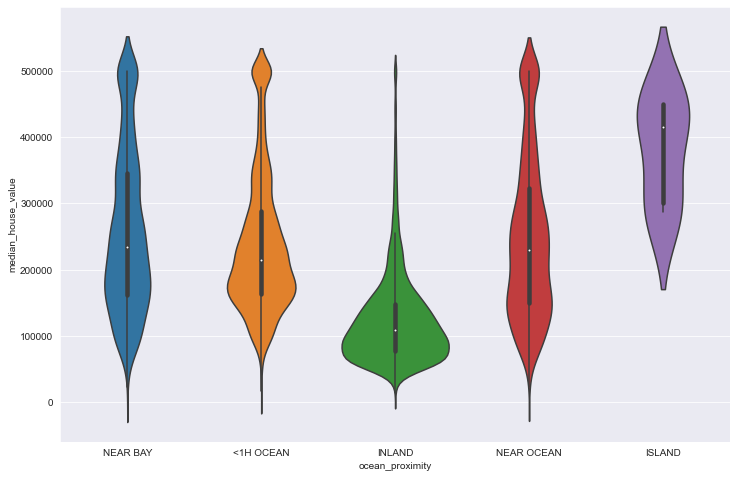

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.violinplot(x='ocean_proximity', y='median_house_value', data=housing_data)

In [27]:
mpg_data = pd.read_json('datasets/auto-mpg.json')
mpg_data.replace('.', nan, inplace=True)
mpg_data.replace('?', nan, inplace=True)
mpg_data = mpg_data.dropna()
mpg_data = mpg_data[
    [
        'acceleration', 'car name', 'cylinders', 'displacement', 'horsepower', 'model year',
        'mpg', 'origin', 'weight'
    ]
]

mpg_data.head()

,acceleration,car name,cylinders,displacement,horsepower,model year,mpg,origin,weight
0,12.0,chevrolet chevelle malibu,8,307.0,130.0,70,18.0,1,3504
1,11.5,buick skylark 320,8,350.0,165.0,70,15.0,1,3693
2,11.0,plymouth satellite,8,318.0,150.0,70,18.0,1,3436
3,12.0,amc rebel sst,8,304.0,150.0,70,16.0,1,3433
4,10.5,ford torino,8,302.0,140.0,70,17.0,1,3449


In [30]:
mpg_data['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

<Axes: xlabel='model year', ylabel='mpg'>

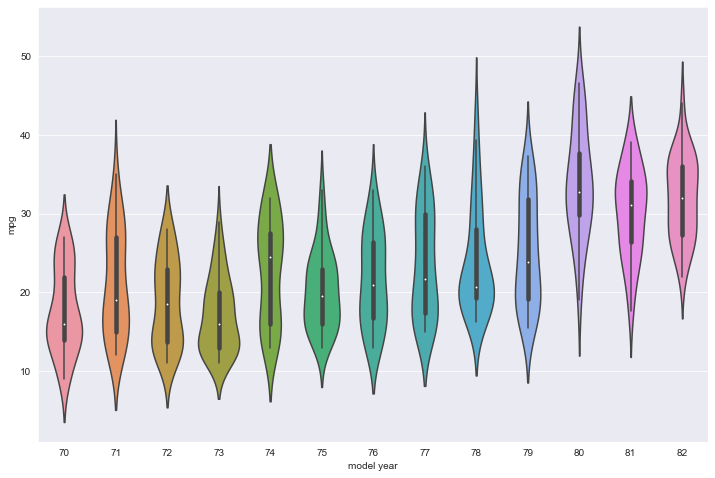

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.violinplot(x='model year', y='mpg', data=mpg_data)

<Axes: xlabel='cylinders', ylabel='mpg'>

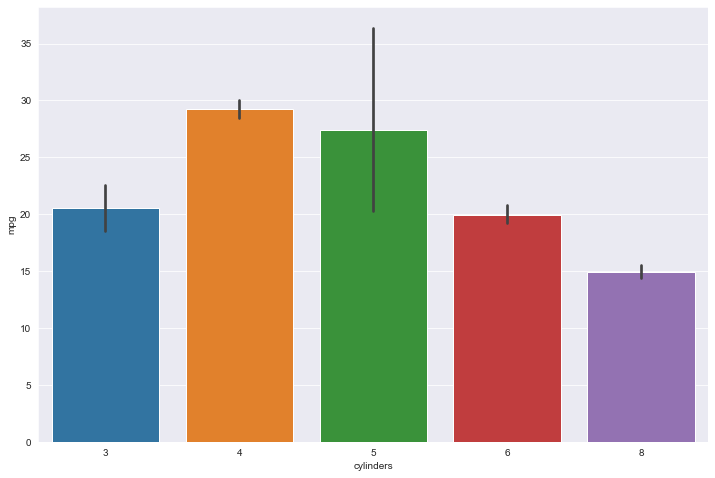

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='cylinders', y='mpg', data=mpg_data)

<Axes: xlabel='cylinders', ylabel='mpg'>

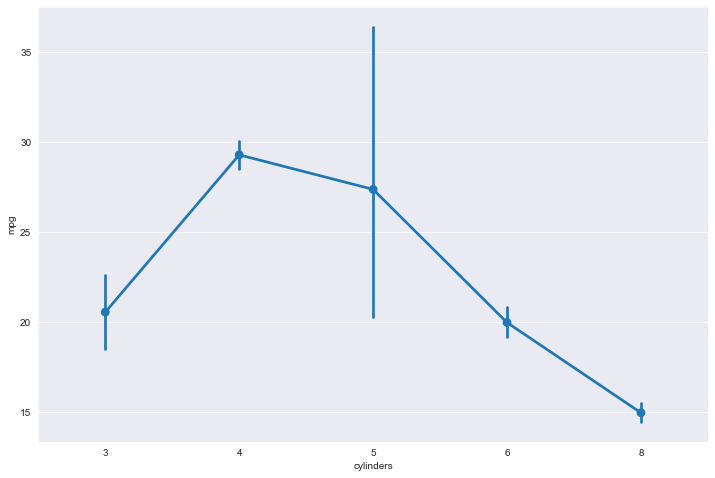

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.pointplot(x='cylinders', y='mpg', data=mpg_data)

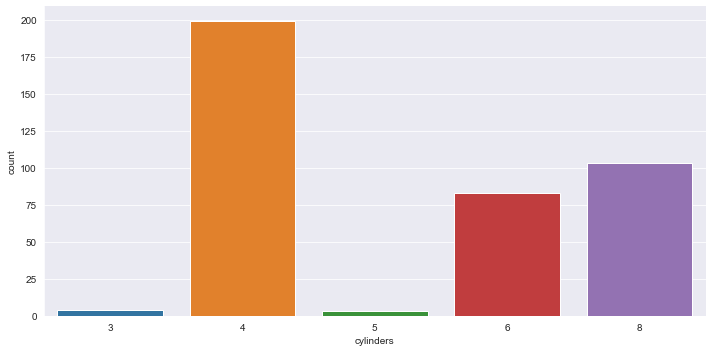

In [62]:
sns.catplot(
    x='cylinders', data=mpg_data, height=5, aspect=2, kind='count'
)

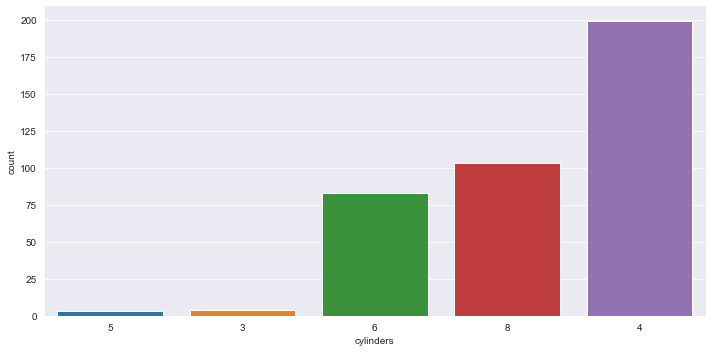

In [61]:
sns.catplot(
    x='cylinders', data=mpg_data, height=5, aspect=2, kind='count',
    order=mpg_data['cylinders'].value_counts().sort_values().index
)